| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./5_Inferencia_Estadistica.ipynb)| [⏩](./7_Regresion_y_Correlacion.ipynb)|

# **6. Pruebas de Hipótesis**

## **Conceptos Básicos de Pruebas de Hipótesis**

### **Formulación de hipótesis nula y alternativa**

La formulación de hipótesis es una parte esencial del método científico y estadístico. En estadísticas, las hipótesis se dividen generalmente en dos categorías: la hipótesis nula $(H_0)$ y la hipótesis alternativa $(H_1)$ o $(H_a)$.

**Hipótesis Nula $(H_0)$:**

- Es una afirmación que no hay efecto o diferencia significativa en la población.
- Se representa típicamente como una afirmación de igualdad o ausencia de efecto.
- Es la hipótesis que se somete a prueba.

**Hipótesis Alternativa $(H_1)$ o $(H_a)$:**

- Es una afirmación que contradice la hipótesis nula.
- Puede ser direccional (una afirmación específica sobre la dirección del efecto) o no direccional (simplemente afirma que hay un efecto).
- Es lo que se busca probar.

**Ejemplo y Código Python:**

Supongamos que queremos probar si la media de una muestra es diferente de un valor específico $( \mu_0 )$.

**Hipótesis Nula y Alternativa:**

$H_0: \mu = \mu_0$

$H_1: \mu \neq \mu_0$

**Código Python:**

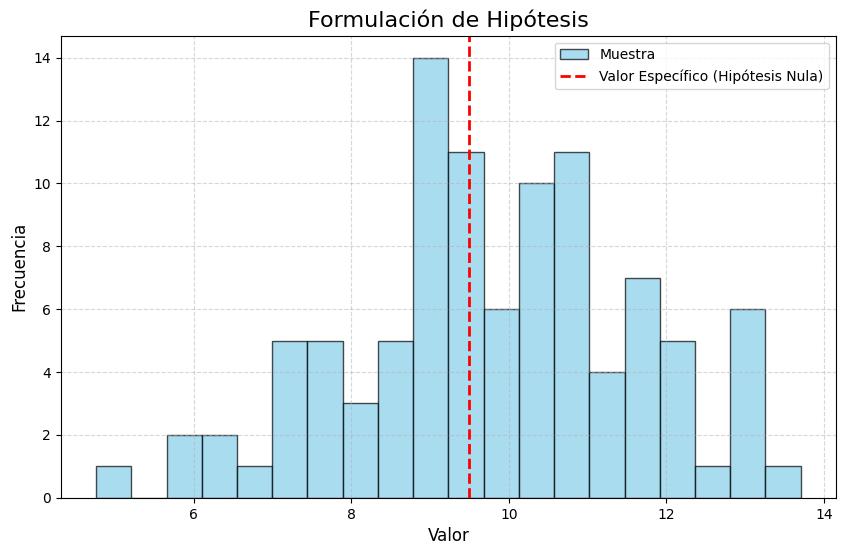

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Configuración de la simulación
np.random.seed(42)
media_poblacional = 10
desviacion_poblacional = 2
tamanos_muestra = 100

# Generar una muestra de una distribución normal
muestra = np.random.normal(loc=media_poblacional, scale=desviacion_poblacional, size=tamanos_muestra)

# Valor específico para la hipótesis nula
valor_especifico = 9.5

# Personalización de la gráfica
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Histograma de la muestra
plt.hist(muestra, bins=20, alpha=0.7, color='skyblue', edgecolor='black', label='Muestra')

# Línea vertical para el valor específico (Hipótesis Nula)
plt.axvline(valor_especifico, color='red', linestyle='dashed', linewidth=2, label='Valor Específico (Hipótesis Nula)')

# Etiquetas y títulos
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Formulación de Hipótesis', fontsize=16)

# Leyenda
plt.legend()

# Añadir una cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()

En este código, generamos una muestra de una distribución normal y visualizamos la muestra en un histograma. La línea roja representa el valor específico que estamos considerando en la hipótesis nula. En este caso, la hipótesis nula $(H_0)$ sería que la media de la población es igual a este valor específico, y la hipótesis alternativa $(H_1)$ sería que la media es diferente. Este es un ejemplo de una prueba de dos colas. Si fuera una prueba de una cola, la hipótesis alternativa se expresaría de manera diferente, por ejemplo, $(H_1: \mu > \mu_0)$ o $(H_1: \mu < \mu_0)$.

### **Niveles de significancia y errores tipo I y II**

**Niveles de Significancia:**

El nivel de significancia $(\alpha)$ es la probabilidad de cometer un error tipo I en una prueba de hipótesis. Es la probabilidad de rechazar incorrectamente la hipótesis nula cuando es verdadera. Los valores comunes para $(\alpha)$ son 0.05, 0.01, o 0.10, lo que indica el riesgo que estás dispuesto a aceptar de cometer un error tipo I.

**Errores Tipo I y II:**

1. **Error Tipo I $(\alpha)$:**

   - Ocurre cuando se rechaza incorrectamente la hipótesis nula cuando es verdadera.
   - Probabilidad de cometer un error tipo I es $(\alpha)$.
   - Se asocia con la región de rechazo en una prueba de hipótesis.

2. **Error Tipo II $(\beta)$:**

   - Ocurre cuando no se rechaza la hipótesis nula cuando es falsa.
   - Probabilidad de cometer un error tipo II es $(\beta)$.
   - Se asocia con la región de aceptación en una prueba de hipótesis.

**Ejemplo y Código Python:**

Supongamos que estamos probando si la media de una muestra es igual a un valor específico $(\mu_0)$.

**Fórmulas:**

- Hipótesis Nula $(H_0)$: $(\mu = \mu_0)$
- Hipótesis Alternativa $(H_1)$: $(\mu \neq \mu_0)$

**Código Python:**

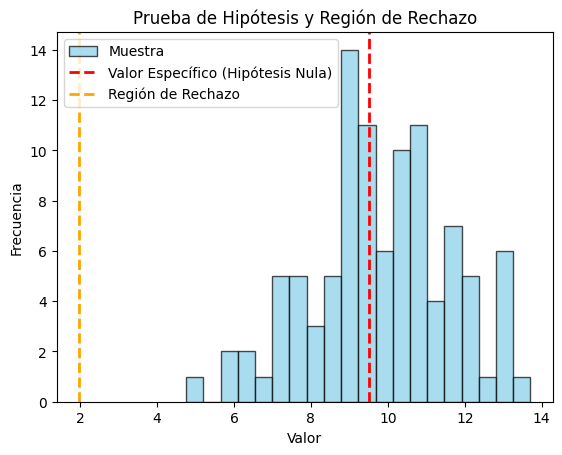

Estadístico de prueba: 1.609321334000954
Valor p: 0.110730399982307


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Configuración de la simulación
np.random.seed(42)
media_poblacional = 10
desviacion_poblacional = 2
tamanos_muestra = 100

# Generar una muestra de una distribución normal
muestra = np.random.normal(loc=media_poblacional, scale=desviacion_poblacional, size=tamanos_muestra)

# Valor específico para la hipótesis nula
valor_especifico = 9.5

# Nivel de significancia
nivel_significancia = 0.05

# Prueba de hipótesis
estadistico, valor_p = stats.ttest_1samp(muestra, valor_especifico)

# Región de rechazo
region_rechazo = stats.t.ppf(1 - nivel_significancia/2, df=len(muestra)-1)

# Visualización en gráfico
plt.hist(muestra, bins=20, alpha=0.7, color='skyblue', edgecolor='black', label='Muestra')
plt.axvline(valor_especifico, color='red', linestyle='dashed', linewidth=2, label='Valor Específico (Hipótesis Nula)')
plt.axvline(region_rechazo, color='orange', linestyle='dashed', linewidth=2, label='Región de Rechazo')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Prueba de Hipótesis y Región de Rechazo')
plt.legend()
plt.show()

# Imprimir resultados
print(f"Estadístico de prueba: {estadistico}")
print(f"Valor p: {valor_p}")

En este código, realizamos una prueba de hipótesis utilizando la prueba t de una muestra y visualizamos la muestra y la región de rechazo en un histograma. El valor p nos permite tomar decisiones basadas en el nivel de significancia predefinido $(\alpha)$.

## **Pruebas Paramétricas y No Paramétricas**

### **Pruebas t y z**

**Prueba t:**

La prueba t es una prueba estadística utilizada para comparar las medias de dos muestras o para probar la diferencia entre la media de una muestra y un valor conocido. Es especialmente útil cuando se trabaja con muestras pequeñas y se desconoce la desviación estándar de la población. La fórmula básica para la prueba t de una muestra es:

$t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$

donde:

- $(\bar{X})$ es la media muestral.
- $(\mu)$ es la media poblacional bajo la hipótesis nula.
- $(s)$ es la desviación estándar muestral.
- $(n)$ es el tamaño de la muestra.

**Prueba z:**

La prueba z es una prueba estadística que se utiliza cuando la desviación estándar de la población es conocida y se tiene una muestra grande. La fórmula básica para la prueba z de una muestra es:

$z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$

donde:

- $(\bar{X})$ es la media muestral.
- $(\mu)$ es la media poblacional bajo la hipótesis nula.
- $(\sigma)$ es la desviación estándar poblacional.
- $(n)$ es el tamaño de la muestra.

**Ejemplo y Código Python:**

Supongamos que queremos realizar una prueba para determinar si la media de una muestra es significativamente diferente de un valor específico $(\mu_0)$.

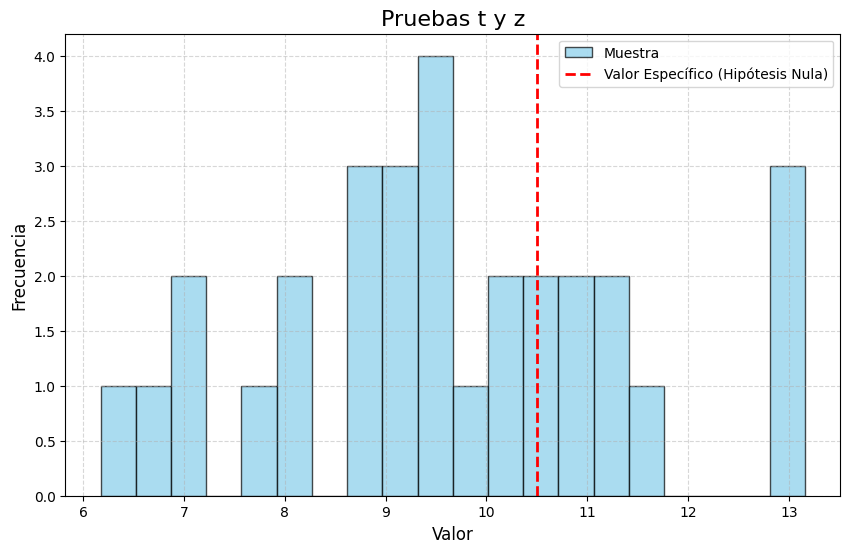

Estadístico de prueba t: -2.666458050206547
Valor p (prueba t): 0.012403427775427503
Estadístico de prueba z: -2.3998293835847946


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Configuración de la simulación
np.random.seed(42)
media_poblacional = 10
desviacion_poblacional = 2
tamanos_muestra = 30

# Generar una muestra de una distribución normal
muestra = np.random.normal(loc=media_poblacional, scale=desviacion_poblacional, size=tamanos_muestra)

# Valor específico para la hipótesis nula
valor_especifico = 10.5

# Realizar la prueba t
t_statistic, p_value_t = stats.ttest_1samp(muestra, valor_especifico)

# Realizar la prueba z (suponiendo conocimiento de la desviación estándar poblacional)
z_statistic = (np.mean(muestra) - valor_especifico) / (desviacion_poblacional / np.sqrt(tamanos_muestra))

# Personalización de la gráfica
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Histograma de la muestra
plt.hist(muestra, bins=20, alpha=0.7, color='skyblue', edgecolor='black', label='Muestra')

# Línea vertical para el valor específico (Hipótesis Nula)
plt.axvline(valor_especifico, color='red', linestyle='dashed', linewidth=2, label='Valor Específico (Hipótesis Nula)')

# Etiquetas y títulos
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Pruebas t y z', fontsize=16)

# Leyenda
plt.legend()

# Añadir una cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()

# Imprimir resultados
print(f"Estadístico de prueba t: {t_statistic}")
print(f"Valor p (prueba t): {p_value_t}")
print(f"Estadístico de prueba z: {z_statistic}")

En este código, generamos una muestra de una distribución normal y realizamos tanto una prueba t como una prueba z para evaluar si la media de la muestra es significativamente diferente de un valor específico. La visualización incluye un histograma de la muestra y una línea para el valor específico de la hipótesis nula.

### **Pruebas de Wilcoxon, Mann-Whitney, etc**

**Prueba de Wilcoxon (Prueba de Rangos con Signos):**

La prueba de Wilcoxon es una prueba no paramétrica que se utiliza para determinar si hay diferencias significativas entre dos muestras relacionadas. Se utiliza comúnmente para muestras pareadas o relacionadas. La hipótesis nula $(H_0)$ afirma que no hay diferencia significativa entre las dos muestras.

**Fórmula del Estadístico de Wilcoxon:**

$W = \text{min} \left( \sum R_+, \sum R_- \right)$

donde:

- $( R_+ )$ es la suma de los rangos positivos (diferencias positivas),
- $( R_- )$ es la suma de los rangos negativos (diferencias negativas).

**Prueba de Mann-Whitney U:**

La prueba de Mann-Whitney U es otra prueba no paramétrica utilizada para determinar si hay diferencias significativas entre dos muestras independientes. La hipótesis nula $(H_0)$ afirma que no hay diferencia significativa entre las dos muestras.

**Fórmula del Estadístico de Mann-Whitney U:**

$U = R_1 - \frac{n_1 \cdot (n_1 + 1)}{2}$

donde:

- $( R_1 )$ es la suma de los rangos de la primera muestra,
- $( n_1 )$ es el tamaño de la primera muestra.

**Ejemplo y Código Python:**

Supongamos que queremos comparar dos muestras relacionadas y dos muestras independientes utilizando estas pruebas.

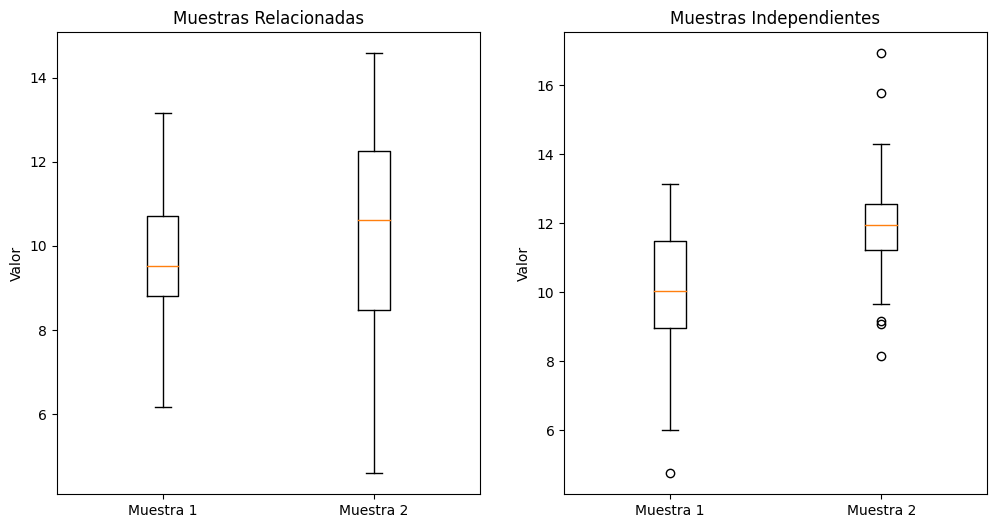

Prueba de Wilcoxon - Estadístico: 133.0, p-valor: 0.04048972204327583
Prueba de Mann-Whitney U - Estadístico U: 213.0, p-valor: 0.0004713751442131583


In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Configuración de la simulación
np.random.seed(42)
tamanos_muestra = 30

# Muestras relacionadas (Wilcoxon)
muestra1_relacionada = np.random.normal(loc=10, scale=2, size=tamanos_muestra)
muestra2_relacionada = muestra1_relacionada + np.random.normal(loc=1, scale=2, size=tamanos_muestra)

# Muestras independientes (Mann-Whitney)
muestra1_independiente = np.random.normal(loc=10, scale=2, size=tamanos_muestra)
muestra2_independiente = np.random.normal(loc=12, scale=2, size=tamanos_muestra)

# Realizar la prueba de Wilcoxon
stat_wilcoxon, p_value_wilcoxon = stats.wilcoxon(muestra1_relacionada, muestra2_relacionada)

# Realizar la prueba de Mann-Whitney U
stat_mannwhitney, p_value_mannwhitney = stats.mannwhitneyu(muestra1_independiente, muestra2_independiente)

# Visualización en gráficos
plt.figure(figsize=(12, 6))

# Gráfico para muestras relacionadas (Wilcoxon)
plt.subplot(1, 2, 1)
plt.boxplot([muestra1_relacionada, muestra2_relacionada], labels=['Muestra 1', 'Muestra 2'])
plt.title('Muestras Relacionadas')
plt.ylabel('Valor')

# Gráfico para muestras independientes (Mann-Whitney)
plt.subplot(1, 2, 2)
plt.boxplot([muestra1_independiente, muestra2_independiente], labels=['Muestra 1', 'Muestra 2'])
plt.title('Muestras Independientes')
plt.ylabel('Valor')

plt.show()

# Imprimir resultados
print(f"Prueba de Wilcoxon - Estadístico: {stat_wilcoxon}, p-valor: {p_value_wilcoxon}")
print(f"Prueba de Mann-Whitney U - Estadístico U: {stat_mannwhitney}, p-valor: {p_value_mannwhitney}")

En este código, hemos generado dos conjuntos de muestras (relacionadas e independientes) y hemos realizado las pruebas de Wilcoxon y Mann-Whitney U. La visualización incluye diagramas de caja para ambas situaciones. Puedes personalizar los gráficos según tus preferencias.

| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./5_Inferencia_Estadistica.ipynb)| [⏩](./7_Regresion_y_Correlacion.ipynb)|